#   Introduction to Neural Networks in TensorFlow

In [11]:
import tensorflow as tf
tf.__version__


'2.8.0'

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
X = np.array([float(i) for i in range(-7, 15, 3)])
Y = np.array([float(i+10) for i in range(-7, 15, 3)])
X,Y


(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

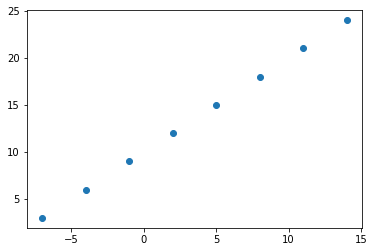

In [14]:
plt.scatter(X, Y)


In [15]:
Y = np.array([float(i+10) for i in range(-7, 15, 3)])
Y


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [16]:
X + 10


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [17]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output Shapes


In [18]:
#
house_info = tf.constant(["bathroom", "bedroom", "garage"])
house_price = tf.constant([90000])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bathroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([90000])>)

In [19]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape


((8,), (8,))

In [20]:
X = tf.constant(X)
Y = tf.constant(Y)
X, Y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
X[0].shape, Y[0].shape


(TensorShape([]), TensorShape([]))

### Creating a Model

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
)

model.fit(tf.expand_dims(X,-1), Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mean_absolute_error: 10.9748


In [23]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improvement 1

In [33]:

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae
              )
with tf.device("/gpu:0"):
    model1.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 765ms/step - loss: 11.2219 - mean_absolute_error: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.0894 - mean_absolute_error: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9569 - mean_absolute_error: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mean_absolute_error: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6919 - mean_absolute_error: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5594 - mean_absolute_error: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mean_absolute_error: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2944 - mean_absolute_error: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mean_absolute_error: 10.1619
E

In [34]:
model1.predict([17.0])

array([[29.739855]], dtype=float32)

### Improvement 2

In [35]:

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model2.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 454ms/step - loss: 12.3193 - mean_absolute_error: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7804 - mean_absolute_error: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2324 - mean_absolute_error: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6601 - mean_absolute_error: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0632 - mean_absolute_error: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 9.4503 - mean_absolute_error: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7991 - mean_absolute_error: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mean_absolute_error: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3691 - mean_absolute_error: 7.3691
Epoch 10/100

In [36]:
model2.predict([17.0])

array([[31.223137]], dtype=float32)

In [39]:

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model3.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 509ms/step - loss: 12.5419 - mean_absolute_error: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0344 - mean_absolute_error: 12.0344
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5205 - mean_absolute_error: 11.5205
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9976 - mean_absolute_error: 10.9976
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4629 - mean_absolute_error: 10.4629
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9137 - mean_absolute_error: 9.9137
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3473 - mean_absolute_error: 9.3473
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7606 - mean_absolute_error: 8.7606
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1507 - mean_absolute_error: 8.1507
Epoch 10/100


In [40]:
model3.predict([17.0])

array([[29.52236]], dtype=float32)

In [59]:

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model4.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 593ms/step - loss: 12.3612 - mean_absolute_error: 12.3612
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6929 - mean_absolute_error: 11.6929
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0183 - mean_absolute_error: 11.0183
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3345 - mean_absolute_error: 10.3345
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6374 - mean_absolute_error: 9.6374
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9227 - mean_absolute_error: 8.9227
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1862 - mean_absolute_error: 8.1862
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4241 - mean_absolute_error: 7.4241
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8746 - mean_absolute_error: 6.8746
Epoch 10/100

In [62]:
model4.predict([17.0])

array([[26.795538]], dtype=float32)